In [12]:
import pandas as pd

# Assuming your JSON data is saved in a file called 'data.json'
file_path = r'C:\Users\jakub\Skrivebord\semester 7\projectCode\project\persorCounter\people-counter.json' # Update this to the path where your JSON file is saved
data = pd.read_json(file_path)

# Convert 'time' to datetime for better plotting
data['time'] = pd.to_datetime(data['time'])

# Configure Pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame to verify all rows
display(data)

,rssi,batteryLevel,networkId,personCount,seqNumber,time,createdAt
0,-140,5.65,1FA5528,2,1237,2023-12-01 05:29:52+00:00,2023-12-01T06:19:54.066Z
1,-140,5.65,1FA5528,5,1237,2023-12-01 05:39:52+00:00,2023-12-01T06:19:54.067Z
2,-140,5.65,1FA5528,4,1237,2023-12-01 05:49:52+00:00,2023-12-01T06:19:54.067Z
3,-140,5.65,1FA5528,12,1237,2023-12-01 05:59:52+00:00,2023-12-01T06:19:54.067Z
4,-140,5.65,1FA5528,4,1237,2023-12-01 06:09:52+00:00,2023-12-01T06:19:54.067Z
5,-140,5.65,1FA5528,6,1237,2023-12-01 06:19:52+00:00,2023-12-01T06:19:54.067Z
6,-141,5.70,1FA5528,4,1238,2023-12-01 06:31:09+00:00,2023-12-01T07:21:11.173Z
7,-141,5.70,1FA5528,4,1238,2023-12-01 06:41:09+00:00,2023-12-01T07:21:11.174Z
8,-141,5.70,1FA5528,5,1238,2023-12-01 06:51:09+00:00,2023-12-01T07:21:11.174Z
9,-141,5.70,1FA5528,5,1238,2023-12-01 07:01:09+00:00,2023-12-01T07:21:11.174Z


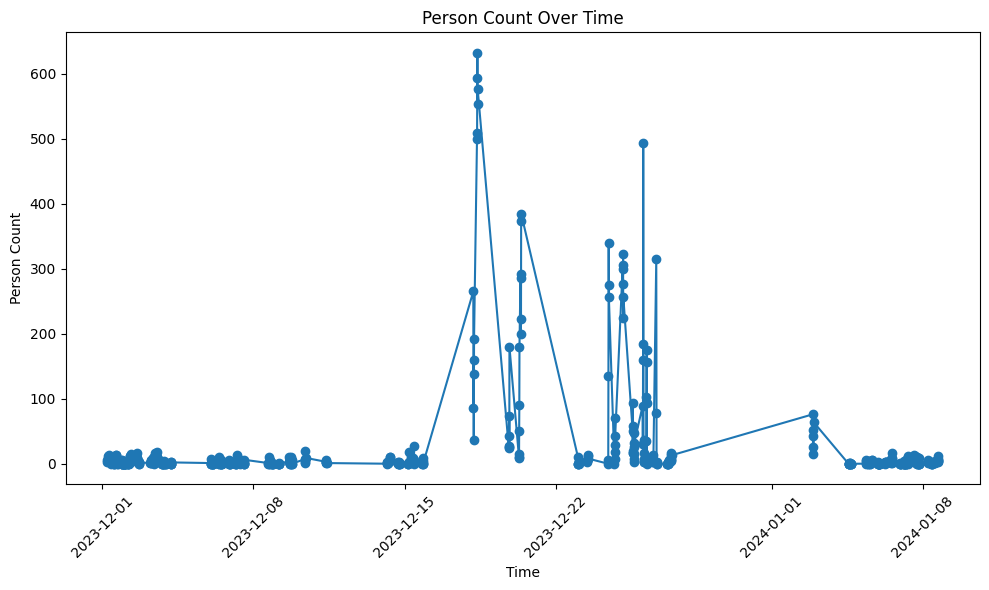

In [13]:
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['personCount'], marker='o')
plt.title('Person Count Over Time')
plt.xlabel('Time')
plt.ylabel('Person Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

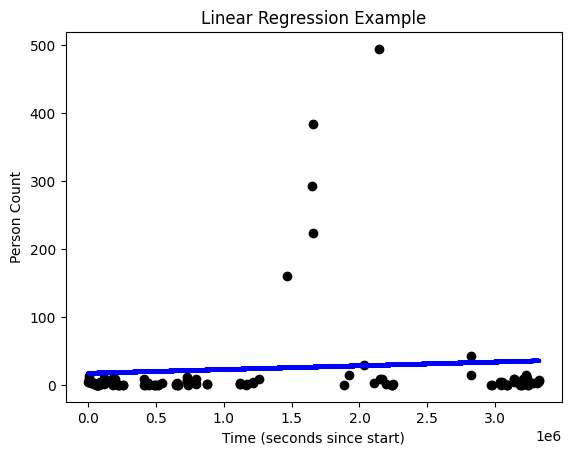

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., seconds since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['personCount']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Optional: Plot the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Time (seconds since start)')
plt.ylabel('Person Count')
plt.title('Linear Regression Example')
plt.show()